We wrote a script for importing streamgage data through the USGS web services, cleaning up the formatting, plotting the discharge over time, and saving the figure into a file. We would like to turn this script into a tool that we can reuse for different stations and date ranges without having to rewrite the code. Let's look at the code again (I deleted the rows that were commented out):

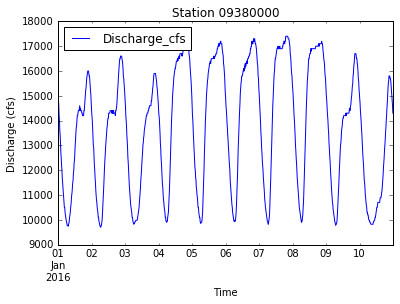

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

new_column_names = ['Agency', 'Station', 'OldDateTime', 'Timezone', 'Discharge_cfs', 'Discharge_stat', 'Stage_ft', 'Stage_stat']

url = 'http://waterservices.usgs.gov/nwis/iv/?format=rdb&sites=09380000&startDT=2016-01-01&endDT=2016-01-10&parameterCd=00060,00065'
data = pd.read_csv(url, header=1, sep='\t', comment='#', names = new_column_names)

data['DateTime'] = pd.to_datetime(data['OldDateTime'])

new_station_name = "0" + str(data['Station'].unique()[0])
data['Station'] = new_station_name

data.plot(x='DateTime', y='Discharge_cfs', title='Station ' + new_station_name)
plt.xlabel('Time')
plt.ylabel('Discharge (cfs)')
plt.savefig('data/discharge_' + new_station_name + '.png')
plt.show()

The station number and date range we are interested in are part of the URL that we use to communicate with the web services. The specific file we receive when the `read_csv` command runs doesn't exist -- when our script requests the data, the server reads the URL to see what we want, pulls data from a database, packages it, and passes it on to us. The API (the protocol that governs the communication between machines) establishes the "formula" for writing the URL. As long as we follow that formula (and request data that exists), the server will provide it for us.

Let's decompose the URL into its parts and combine them back into a single string:

In [2]:
url_root = 'http://waterservices.usgs.gov/nwis/iv/?' # root of URL

url_1 = 'format=' + 'rdb' # file format

url_2 = 'sites=' + '09380000' # station number

url_3 = 'startDT=' + '2016-01-01' # start date

url_4 = 'endDT=' + '2016-01-10' # end date

url_5 = 'parameterCd=' + '00060,00065' # data fields


url = url_root + url_1 + '&' + url_2 + '&' + url_3 + '&' + url_4 + '&' + url_5
print url

http://waterservices.usgs.gov/nwis/iv/?format=rdb&sites=09380000&startDT=2016-01-01&endDT=2016-01-10&parameterCd=00060,00065


## Python dictionaries to URLs {.callout}

Another useful data type built into Python is the **dictionary**. While lists and other sequences are indexed by a range of numbers, dictionaries are indexed by **keys**. A dictionary is an unordered collection of key:value pairs. Keys must be unique (within any one dictionary) and can be strings or numbers. Values in a dictionary can be of any type, and different pairs in one dictionary can have different types of values.

We can store the parameters of our URL in a dictionary. Here's one of several ways to add entries to a dictionary:


In [3]:
url_dict = {} # create an empty dictionary

url_dict['format'] = 'rdb'
url_dict['sites'] = '09380000'
url_dict['startDT'] = '2016-01-01'
url_dict['endDT'] = '2016-01-10'
url_dict['parameterCd'] = ['00060','00065']

print url_dict

{'parameterCd': ['00060', '00065'], 'endDT': '2016-01-10', 'startDT': '2016-01-01', 'sites': '09380000', 'format': 'rdb'}


Just like there is the Numpy library for matrices and Pandas for tabular data, there is a Python library that provides a simple interface for accessing resources through URLs (take a look at the most popular package repository: https://pypi.python.org/). Many of the most popular and useful libraries for scientific computing come pre-installed with the Anaconda distribution.

We can use the `urllib` package to convert the dictionary into a URL following the standard format used by web services. The order of the parameters doesn't matter to the server!

In [4]:
import urllib

# need to set the parameter doseq to 1 to handle the list in url_dict['parameterCd']
url_parameters = urllib.urlencode(url_dict, doseq=1)

print url_root + url_parameters

http://waterservices.usgs.gov/nwis/iv/?parameterCd=00060&parameterCd=00065&endDT=2016-01-10&startDT=2016-01-01&sites=09380000&format=rdb


This is not the most elegant way to write the URL but it accomplishes the job! To clean things up a bit, we can replace the values we want to be able to change with variables:

In [5]:
this_station = '09380000'
startDate = '2016-01-01'
endDate = '2016-01-10'


url_root = 'http://waterservices.usgs.gov/nwis/iv/?'
url_1 = 'format=' + 'rdb'
url_2 = 'sites=' + this_station
url_3 = 'startDT=' + startDate
url_4 = 'endDT=' + endDate
url_5 = 'parameterCd=' + '00060,00065'

url = url_root + url_1 + '&' + url_2 + '&' + url_3 + '&' + url_4 + '&' + url_5
print url

http://waterservices.usgs.gov/nwis/iv/?format=rdb&sites=09380000&startDT=2016-01-01&endDT=2016-01-10&parameterCd=00060,00065


We can now combine it with the rest of our code:

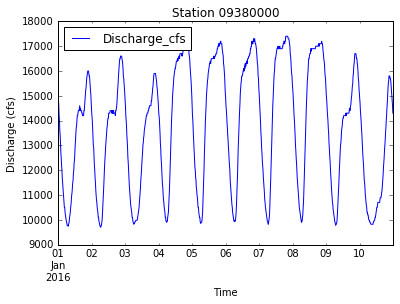

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

########## change these values ###########
this_station = '09380000'
startDate = '2016-01-01'
endDate = '2016-01-10'
##########################################

# create the URL
url_root = 'http://waterservices.usgs.gov/nwis/iv/?'
url_1 = 'format=' + 'rdb'
url_2 = 'sites=' + this_station
url_3 = 'startDT=' + startDate
url_4 = 'endDT=' + endDate
url_5 = 'parameterCd=' + '00060,00065'

url = url_root + url_1 + '&' + url_2 + '&' + url_3 + '&' + url_4 + '&' + url_5

# import the data
new_column_names = ['Agency', 'Station', 'OldDateTime', 'Timezone', 'Discharge_cfs', 'Discharge_stat', 'Stage_ft', 'Stage_stat']

data = pd.read_csv(url, header=1, sep='\t', comment='#', names = new_column_names)

# fix formatting
data['DateTime'] = pd.to_datetime(data['OldDateTime'])
new_station_name = "0" + str(data['Station'].unique()[0])
data['Station'] = new_station_name

# plot and save figure
data.plot(x='DateTime', y='Discharge_cfs', title='Station ' + new_station_name)
plt.xlabel('Time')
plt.ylabel('Discharge (cfs)')
plt.savefig('data/discharge_' + new_station_name + '.png')
plt.show()

## Creating Functions

If we wanted to import data from a different station or for a different date range, we would manually change the first three variables and run the code again. It would be a lot less work than having to download the file and plot it by hand, but it could still be very tedious! At this point, our code is also getting long and complicated; what if we had thousands of datasets but didn't want to generate a figure for every single one? Commenting out the figure-drawing code is a nuisance. Also, what if we want to use that code again, on a different dataset or at a different point in our program? Cutting and pasting it is going to make our code get very long and very repetative, very quickly. We’d like a way to package our code so that it is easier to reuse, and Python provides for this by letting us define things called **function** - a shorthand way of re-executing longer pieces of code.

Let's by defining a function `fahr_to_kelvin` that converts temperatures from Fahrenheit to Kelvin:

In [7]:
def fahr_to_kelvin(temp):
    return ((temp - 32) * (5/9)) + 273.15

The function definition opens with the word def, which is followed by the name of the function and a parenthesized list of parameter names. The body of the function — the statements that are executed when it runs — is indented below the definition line, typically by four spaces.

When we call the function, the values we pass to it are assigned to those variables so that we can use them inside the function. Inside the function, we use a return statement to send a result back to whoever asked for it.

Notice that nothing happened when we ran the cell that contains the function. Python became aware of the function and what it is supposed to do, but until we call it, there is nothing for the function to do.  Calling our own function is no different from calling any other function (see the resemblance with the help file for `read_csv`?):

In [8]:
print 'freezing point of water:', fahr_to_kelvin(32)
print 'boiling point of water:', fahr_to_kelvin(212)

freezing point of water: 273.15
boiling point of water: 273.15


The boiling point of water in Kelvin should be 373.15 K, not 273.15 K!

Functions make code easier to debug by isolating each possible source of error. In this case, the first term of the equation, `((temp - 32) * (5/9))`, is returning 0 (instead of 100) when the temperature is 212 F. If we look at each part of that expression, we find:

In [9]:
5/9

0

5 divided by 9 should be 0.5556, but when we ask Python 2 to divide to integers, it returns an integer! If we want to want to keep the fractional part of the division, we need to convert one or the other number to floating point:

In [10]:
print 'two integers:', 5/9
print '5.0/9:', 5.0/9
print '5/9.0:', 5/9.0

two integers: 0
5.0/9: 0.555555555556
5/9.0: 0.555555555556


You can also turn an integer into a float by **casting**:

In [11]:
float(5)/9

0.5555555555555556

## Casting {.challenge}

What happens when you type `float(5/9)`?

## Integer division in Python 3 {.callout}

The problem of integer division does not exist in Python 3, where division always returns a floating point number. We use Python 2.7 because it is much more commonly used in our community, but always keep integer division in mind as it will be a common source of bugs in your code. And as annoying as it may seem, there are memory benefits to integer division!

Let's rewrite our function with the fixed bug:

In [12]:
def fahr_to_kelvin(temp):
    return ((temp - 32) * (5./9)) + 273.15

print 'freezing point of water:', fahr_to_kelvin(32)
print 'boiling point of water:', fahr_to_kelvin(212)

freezing point of water: 273.15
boiling point of water: 373.15


## Composing Functions

Now that we’ve seen how to turn Fahrenheit into Kelvin, it’s easy to turn Kelvin into Celsius:

In [13]:
def kelvin_to_celsius(temp_k):
    return temp_k - 273.15

print 'absolute zero in Celsius:', kelvin_to_celsius(0.0) 

absolute zero in Celsius: -273.15


What about converting Fahrenheit to Celsius? We could write out the formula, but we don’t need to. Instead, we can compose the two functions we have already created:

In [14]:
def fahr_to_celsius(temp_f):
    temp_k = fahr_to_kelvin(temp_f)
    temp_c = kelvin_to_celsius(temp_k)
    return temp_c

print 'freezing point of water in Celsius:', fahr_to_celsius(32.0) 

freezing point of water in Celsius: 0.0


This is our first taste of how larger programs are built: we define basic operations, then combine them in ever-large chunks to get the effect we want. Real-life functions will usually be larger than the ones shown here — typically half a dozen to a few dozen lines — but they shouldn’t ever be much longer than that, or the next person who reads it won’t be able to understand what’s going on.

## Tidying up

Now that we know how to wrap bits of code in functions, we can make our streamgage data plotting code easier to read and easier to reuse. First, let's make a `import_streamgage_data` function to pull the data file from the server and fix the formatting:

In [15]:
def import_streamgage_data(url):
    
    new_column_names = ['Agency', 'Station', 'OldDateTime', 'Timezone', 'Discharge_cfs', 'Discharge_stat', 'Stage_ft', 'Stage_stat']

    data = pd.read_csv(url, header=1, sep='\t', comment='#', names = new_column_names)

    # fix formatting
    data['DateTime'] = pd.to_datetime(data['OldDateTime'])
    new_station_name = "0" + str(data['Station'].unique()[0])
    data['Station'] = new_station_name
    
    return data

We can make another function `plot_discharge` to compose to plot and save the figures:

In [16]:
def plot_discharge(data):
    
    data.plot(x='DateTime', y='Discharge_cfs', title='Station ' + new_station_name)
    plt.xlabel('Time')
    plt.ylabel('Discharge (cfs)')
    plt.savefig('data/discharge_' + new_station_name + '.png')
    plt.show()

The function `plot_discharge` produces output that is visible to us but has no return statement because it doesn't need to give anything back when it is called.

We can also wrap up the script for composing URLs into a function called `generate_URL`:

In [17]:
def generate_URL(station, startDT, endDT):

    url_root = 'http://waterservices.usgs.gov/nwis/iv/?'
    url_1 = 'format=' + 'rdb'
    url_2 = 'sites=' + station
    url_3 = 'startDT=' + startDT
    url_4 = 'endDT=' + endDT
    url_5 = 'parameterCd=' + '00060,00065'

    url = url_root + url_1 + '&' + url_2 + '&' + url_3 + '&' + url_4 + '&' + url_5
    
    return url

Now that these three functions exist, we can rewrite our previous code in a much simpler script:

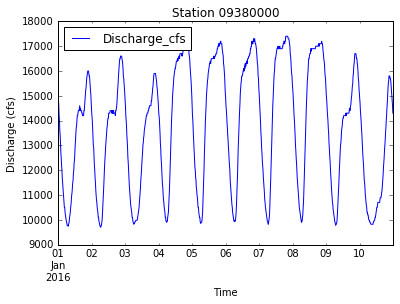

In [18]:
########## change these values ###########
this_station = '09380000'
startDate = '2016-01-01'
endDate = '2016-01-10'
##########################################

url = generate_URL(this_station, startDate, endDate)
data = import_streamgage_data(url)
plot_discharge(data)


## Testing and Documenting

It doesn't long to forget what code we wrote in the past was supposed to do. We should always write some documentation for our functions to remind ourselves later what they are for and how they are supposed to be used.

The usual way to put documentation in software is to add comments:

In [19]:
# plot_discharge(data): take a DataFrame containing streamgage data, plot the discharge and save a figure to file.
def plot_discharge(data):
    
    data.plot(x='DateTime', y='Discharge_cfs', title='Station ' + new_station_name)
    plt.xlabel('Time')
    plt.ylabel('Discharge (cfs)')
    plt.savefig('data/discharge_' + new_station_name + '.png')
    plt.show()

There’s a better way, though. If the first thing in a function is a string that isn’t assigned to a variable, that string is attached to the function as its documentation. A string like this is called a **docstring** (one set of quotes for single line strings, three sets for multi-line strings!):

In [20]:
def plot_discharge(data):
    '''
    Take a DataFrame containing streamgage data,
    plot the discharge and save a figure to file.
    '''
    
    data.plot(x='DateTime', y='Discharge_cfs', title='Station ' + new_station_name)
    plt.xlabel('Time')
    plt.ylabel('Discharge (cfs)')
    plt.savefig('data/discharge_' + new_station_name + '.png')
    plt.show()

This is better because we can now ask Python’s built-in help system to show us the documentation for the function:

In [21]:
help(plot_discharge)

Help on function plot_discharge in module __main__:

plot_discharge(data)
    Take a DataFrame containing streamgage data,
    plot the discharge and save a figure to file.



## Defining Defaults:

When we use the `read_csv` method, we pass parameters in two ways: directly, as in `pd.read_csv(url)`, and by name, as we did for the parameter `sep` in `pd.read_csv(url, sep = '\t')`.

If we look at the documentation for `read_csv`, all parameters but the first (`filepath_or_buffer`) have a default value in the function definition (`sep=','`). The function will not run if the parameters without default values are not provided, but all parameters with defaults are optional. This is handy: if we usually want a function to work one way but occasionally need it to do something else, we can allow people to pass a parameter when they need to but provide a default to make the normal case easier.

The example below shows how Python matches values to parameters:

In [22]:
def display(a=1, b=2, c=3):
    print 'a:', a, 'b:', b, 'c:', c 

print 'no parameters:' 
display()

print 'one parameter:'
display(55)

print 'two parameters:'
display(55, 66)

no parameters:
a: 1 b: 2 c: 3
one parameter:
a: 55 b: 2 c: 3
two parameters:
a: 55 b: 66 c: 3


As this example shows, parameters are matched up from left to right, and any that haven’t been given a value explicitly get their default value. We can override this behavior by naming the value as we pass it in:

In [23]:
print('only setting the value of c')
display(c=77)

only setting the value of c
a: 1 b: 2 c: 77


> ## Combining strings {.challenge}
>
> "Adding" two strings produces their concatenation:
> `'a' + 'b'` is `'ab'`.
> Write a function called `fence` that takes two parameters called `original` and `wrapper`
> and returns a new string that has the wrapper character at the beginning and end of the original.
> A call to your function should look like this:
>
> ~~~ {.python}
> print fence('name', '*')
> ~~~
> ~~~ {.output}
> *name*
> ~~~

> ## Selecting characters from strings {.challenge}
>
> If the variable `s` refers to a string,
> then `s[0]` is the string's first character
> and `s[-1]` is its last.
> Write a function called `outer`
> that returns a string made up of just the first and last characters of its input.
> A call to your function should look like this:
>
> ~~~ {.python}
> print outer('helium')
> ~~~
> ~~~ {.output}
> hm
> ~~~

> ## Rescaling an array {.challenge}
>
> Write a function `rescale` that takes an array as input
> and returns a corresponding array of values scaled to lie in the range 0.0 to 1.0.
> (Hint: If $L$ and $H$ are the lowest and highest values in the original array,
> then the replacement for a value $v$ should be $(v-L) / (H-L)$.)

> ## Testing and documenting your function {.challenge}
>
> Run the commands `help(numpy.arange)` and `help(numpy.linspace)`
> to see how to use these functions to generate regularly-spaced values,
> then use those values to test your `rescale` function.
> Once you've successfully tested your function,
> add a docstring that explains what it does.

> ## Defining defaults {.challenge}
>
> Rewrite the `rescale` function so that it scales data to lie between 0.0 and 1.0 by default,
> but will allow the caller to specify lower and upper bounds if they want.
> Compare your implementation to your neighbor's:
> do the two functions always behave the same way?

> ## Variables inside and outside functions {.challenge}
>
> What does the following piece of code display when run - and why?
>
> ~~~ {.python}
> f = 0
> k = 0
>
> def f2k(f):
>   k = ((f-32)*(5.0/9.0)) + 273.15
>   return k
>
> f2k(8)
> f2k(41)
> f2k(32)
>
> print k
> ~~~